In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Priscilla Overbeck de Oliveira

# Exercício 1

### 1) Importando os arquivos

### Carregamento df_jogadores

In [2]:
df_jogadores = pd.DataFrame(pd.read_excel('JOGADORES_NBA.xlsx', sheet_name='Sheet1'))
df_jogadores.drop('Unnamed: 0', axis=1, inplace=True)
print('quantidades:\n', df_jogadores.count())
print('\n')
print('médias:\n', df_jogadores.mean())
df_jogadores.head()

quantidades:
 Player         3921
height         3918
weight         3919
collage        3573
born           3921
birth_city     3452
birth_state    3439
dtype: int64


médias:
 height    514637.390761
weight    226833.080378
born        1962.379750
dtype: float64


,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


### Carregamento df_métricas

In [3]:
df_metricas = pd.DataFrame(pd.read_excel('METRICAS_NBA.xlsx', sheet_name='Sheet1'))
df_metricas.drop('Unnamed: 0', axis=1, inplace=True)
df_metricas.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950,Curly Armstrong,G-F,31.0,FTW,63,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176,NaN,NaN,NaN,217,458
1,1950,Cliff Barker,SG,29.0,INO,49,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109,NaN,NaN,NaN,99,279
2,1950,Leo Barnhorst,SF,25.0,CHS,67,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140,NaN,NaN,NaN,192,438
3,1950,Ed Bartels,F,24.0,TOT,15,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20,NaN,NaN,NaN,29,63
4,1950,Ed Bartels,F,24.0,DNN,13,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20,NaN,NaN,NaN,27,59


### 2) Merge dos dados

In [4]:
df_completo = pd.merge(df_metricas, df_jogadores, how='left', on=['Player'])
df_completo.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,BLK,TOV,PF,PTS,height,weight,collage,born,birth_city,birth_state
0,1950,Curly Armstrong,G-F,31.0,FTW,63,NaN,NaN,NaN,0.368,...,NaN,NaN,217,458,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1950,Cliff Barker,SG,29.0,INO,49,NaN,NaN,NaN,0.435,...,NaN,NaN,99,279,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,1950,Leo Barnhorst,SF,25.0,CHS,67,NaN,NaN,NaN,0.394,...,NaN,NaN,192,438,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,1950,Ed Bartels,F,24.0,TOT,15,NaN,NaN,NaN,0.312,...,NaN,NaN,29,63,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,1950,Ed Bartels,F,24.0,DNN,13,NaN,NaN,NaN,0.308,...,NaN,NaN,27,59,196.0,88.0,North Carolina State University,1925.0,NaN,NaN


### 3) Valores extremos
#### a) height / weight /  TS% / FTr substituir pela média dos respectivos campos da série. Não esquecer que a média está distorcida pelos valores extremos, portanto, é preciso usar a média dos não extremos

In [5]:
## médias dos dados não tratados
print('Média de peso: ', df_completo['weight'].mean())
print('Mediana de peso: ', df_completo['weight'].quantile(0.5))
print('Total de registros peso: ',df_completo['weight'].count())
print('\n')
print('Média de altura: ', df_completo['height'].mean())
print('Mediana de altura: ', df_completo['height'].quantile(0.5))
print('Total de registros altura: ',df_completo['height'].count())
print('\n')
print('Média de TS%: ', df_completo['TS%'].mean())
print('Mediana de TS%: ', df_completo['TS%'].quantile(0.5))
print('Total de registros TS%: ',df_completo['TS%'].count())
print('\n')
print('Média de FTr: ', df_completo['FTr'].mean())
print('Mediana de FTr: ', df_completo['FTr'].quantile(0.5))
print('Total de registros FTr: ',df_completo['FTr'].count())
print('\n')
print('Total de registros geral: ',df_completo['Year'].count())

Média de peso:  252724.61528776248
Mediana de peso:  95.0
Total de registros peso:  24621


Média de altura:  573878.4408798894
Mediana de altura:  201.0
Total de registros altura:  24594


Média de TS%:  1870.5780556280151
Mediana de TS%:  0.506
Total de registros TS%:  24538


Média de FTr:  23885.42191160049
Mediana de FTr:  0.29600000000000004
Total de registros FTr:  24525


Total de registros geral:  24624


# Peso

In [6]:
## valores extremos superiores de peso
df_completo.sort_values(by=['weight'], ascending=False).head(11)
## 10 valores superiores para substituir - 10/24624 = 0.0004
## 163 primeiro valor aceitável

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,BLK,TOV,PF,PTS,height,weight,collage,born,birth_city,birth_state
9247,1989,Anthony Jones,SG,26.0,TOT,33,0.0,196.0,13.4,0.442,...,3.0,5.0,20,76,198.0,888565978.0,"University of Nevada, Las Vegas",1962.0,Washington,District of Columbia
9704,1990,Anthony Jones,SG,27.0,DAL,66,0.0,650.0,7.6,0.435,...,16.0,42.0,77,195,198.0,888565978.0,"University of Nevada, Las Vegas",1962.0,Washington,District of Columbia
9249,1989,Anthony Jones,SG,26.0,DAL,25,0.0,131.0,16.8,0.456,...,2.0,4.0,13,64,198.0,888565978.0,"University of Nevada, Las Vegas",1962.0,Washington,District of Columbia
8429,1987,Anthony Jones,SF,24.0,SAS,49,3.0,744.0,11.1,0.459,...,18.0,38.0,68,286,198.0,888565978.0,"University of Nevada, Las Vegas",1962.0,Washington,District of Columbia
8428,1987,Anthony Jones,SG,24.0,WSB,16,1.0,114.0,8.1,0.478,...,1.0,11.0,11,37,198.0,888565978.0,"University of Nevada, Las Vegas",1962.0,Washington,District of Columbia
8427,1987,Anthony Jones,SF-SG,24.0,TOT,65,4.0,858.0,10.7,0.461,...,19.0,49.0,79,323,198.0,888565978.0,"University of Nevada, Las Vegas",1962.0,Washington,District of Columbia
9248,1989,Anthony Jones,SG,26.0,CHI,8,0.0,65.0,6.4,0.378,...,1.0,1.0,7,12,198.0,888565978.0,"University of Nevada, Las Vegas",1962.0,Washington,District of Columbia
3278,1971,Herb White,PG,22.0,ATL,38,NaN,315.0,8.4,0.445,...,NaN,NaN,62,90,188.0,10918.0,University of Georgia,1948.0,NaN,NaN
1247,1958,Dick Duckett,PG,24.0,CIN,34,NaN,424.0,8.0,0.389,...,NaN,NaN,60,132,185.0,10078.0,St. John's University,1933.0,NaN,NaN
133,1950,Milo Komenich,F-C,29.0,AND,64,NaN,NaN,NaN,0.326,...,NaN,NaN,246,634,201.0,1110.0,University of Wyoming,1920.0,NaN,NaN


In [7]:
## valores extremos inferiores de peso
df_completo.sort_values(by=['weight'], ascending=True).head(30)
## 26 valores inferiores para substituir - 26/24624 = 0.001
## 60 primeiro valor aceitável

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,BLK,TOV,PF,PTS,height,weight,collage,born,birth_city,birth_state
923,1955,Larry Costello,PG,23.0,PHW,19,NaN,463.0,10.5,0.385,...,NaN,NaN,37,118,185.0,0.0,Niagara University,1931.0,Minoa,New York
1696,1962,Larry Costello,PG,30.0,SYR,63,NaN,1854.0,15.6,0.507,...,NaN,NaN,220,867,185.0,0.0,Niagara University,1931.0,Minoa,New York
1585,1961,Larry Costello,PG,29.0,SYR,75,NaN,2167.0,17.2,0.546,...,NaN,NaN,286,1084,185.0,0.0,Niagara University,1931.0,Minoa,New York
1466,1960,Larry Costello,PG,28.0,SYR,71,NaN,2469.0,15.6,0.523,...,NaN,NaN,234,993,185.0,0.0,Niagara University,1931.0,Minoa,New York
1022,1956,Don Bielke,C,NaN,FTW,7,NaN,38.0,12.2,0.579,...,NaN,NaN,9,14,201.0,0.0,Valparaiso University,1931.0,NaN,NaN
1817,1963,Larry Costello,PG,31.0,SYR,78,NaN,2066.0,13.8,0.534,...,NaN,NaN,263,858,185.0,0.0,Niagara University,1931.0,Minoa,New York
2088,1965,Larry Costello,PG,33.0,PHI,64,NaN,1967.0,14.0,0.527,...,NaN,NaN,242,861,185.0,0.0,Niagara University,1931.0,Minoa,New York
1136,1957,Larry Costello,PG,25.0,PHW,72,NaN,2111.0,11.3,0.460,...,NaN,NaN,182,547,185.0,0.0,Niagara University,1931.0,Minoa,New York
1353,1959,Larry Costello,PG,27.0,SYR,70,NaN,2750.0,15.0,0.503,...,NaN,NaN,263,1108,185.0,0.0,Niagara University,1931.0,Minoa,New York
2495,1968,Larry Costello,PG,36.0,PHI,28,NaN,492.0,12.8,0.547,...,NaN,NaN,62,201,185.0,0.0,Niagara University,1931.0,Minoa,New York


In [8]:
## substituindo extremidade superior de peso pela média dos não extremos
df_completo['weight'] = np.where(df_completo['weight'] >= df_completo['weight'].quantile(0.999),
                               
                                  df_completo[(df_completo['weight'] > df_completo['weight'].quantile(0.0004)) & 
                                              (df_completo['weight'] < df_completo['weight'].quantile(0.999))]['weight'].mean(),
                              
                                  df_completo['weight'])

## substituindo extremidade inferior de peso pela média dos não extremos
df_completo['weight'] = np.where(df_completo['weight'] <= df_completo['weight'].quantile(0.0004),
                               
                                  df_completo[(df_completo['weight'] > df_completo['weight'].quantile(0.0004)) & 
                                              (df_completo['weight'] < df_completo['weight'].quantile(0.999))]['weight'].mean(),
                              
                                  df_completo['weight'])
# informações depois dos extremos serem substituídos
print('Total de registros: ',df_completo['weight'].count())
print('Média de peso: ',df_completo['weight'].mean())

Total de registros:  24621
Média de peso:  95.43213392274835


In [9]:
## substituindo os NaN pela média, após a substituição dos extremos
df_completo['weight'] = df_completo['weight'].fillna(value = df_completo['weight'].mean())
print('Total de registros: ',df_completo['weight'].count())
print('Média de peso: ',df_completo['weight'].mean())

Total de registros:  24624
Média de peso:  95.43213392274836


# Altura

In [10]:
## valores extremos superiores de altura
df_completo.sort_values(by=['height'], ascending=False).head(32)
## 30 valores superiores para substituir - 30/24624 = 0.001
## 230 primeiro valor aceitável

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,BLK,TOV,PF,PTS,height,weight,collage,born,birth_city,birth_state
8696,1988,Ben Coleman,PF,26.0,PHI,43,14.0,841.0,11.0,0.575,...,25.0,55.0,120,296,2.015560e+09,106.0,University of Maryland,1961.0,Minneapolis,Minnesota
11399,1994,Ben Coleman,PF,32.0,DET,9,0.0,77.0,11.6,0.491,...,2.0,7.0,9,28,2.015560e+09,106.0,University of Maryland,1961.0,Minneapolis,Minnesota
8695,1988,Ben Coleman,PF,26.0,NJN,27,10.0,657.0,13.2,0.536,...,16.0,72.0,110,297,2.015560e+09,106.0,University of Maryland,1961.0,Minneapolis,Minnesota
8694,1988,Ben Coleman,PF,26.0,TOT,70,24.0,1498.0,12.0,0.555,...,41.0,127.0,230,593,2.015560e+09,106.0,University of Maryland,1961.0,Minneapolis,Minnesota
9130,1989,Ben Coleman,PF,27.0,PHI,58,11.0,703.0,11.2,0.537,...,18.0,48.0,120,295,2.015560e+09,106.0,University of Maryland,1961.0,Minneapolis,Minnesota
8316,1987,Ben Coleman,C,25.0,NJN,68,7.0,1029.0,13.6,0.617,...,31.0,94.0,200,452,2.015560e+09,106.0,University of Maryland,1961.0,Minneapolis,Minnesota
9576,1990,Ben Coleman,PF,28.0,MIL,22,0.0,305.0,12.2,0.548,...,7.0,26.0,54,126,2.015560e+09,106.0,University of Maryland,1961.0,Minneapolis,Minnesota
9986,1991,Thurl Bailey,PF,29.0,UTA,82,22.0,2486.0,12.5,0.513,...,91.0,130.0,160,1017,1.009800e+04,97.0,North Carolina State University,1961.0,Washington,District of Columbia
7533,1985,Thurl Bailey,PF,23.0,UTA,80,68.0,2481.0,14.7,0.533,...,105.0,152.0,215,1212,1.009800e+04,97.0,North Carolina State University,1961.0,Washington,District of Columbia
8660,1988,Thurl Bailey,SF,26.0,UTA,82,10.0,2804.0,16.3,0.547,...,125.0,190.0,186,1604,1.009800e+04,97.0,North Carolina State University,1961.0,Washington,District of Columbia


In [11]:
## valores extremos inferiores de altura
df_completo.sort_values(by=['height'], ascending=True).head(20)
## 19 valores inferiores para substituir - 19/24624 = 0.00077
## 160 primeiro valor aceitável

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,BLK,TOV,PF,PTS,height,weight,collage,born,birth_city,birth_state
12260,1996,Willie Anderson,SG,29.0,TOT,76,44.0,2060.0,11.3,0.507,...,59.0,143.0,230,742,1.0,86.0,University of Georgia,1967.0,Greenville,South Carolina
9980,1991,Willie Anderson,SG,24.0,SAS,75,75.0,2592.0,13.0,0.499,...,46.0,167.0,226,1083,1.0,86.0,University of Georgia,1967.0,Greenville,South Carolina
11807,1995,Willie Anderson,SG,28.0,SAS,38,11.0,556.0,10.3,0.514,...,10.0,38.0,71,185,1.0,86.0,University of Georgia,1967.0,Greenville,South Carolina
6215,1981,Lee Johnson,PF,23.0,DET,2,NaN,10.0,-4.7,0.000,...,0.0,0.0,1,0,1.0,92.0,East Texas State University,1957.0,Plummerville,Arkansas
6214,1981,Lee Johnson,PF,23.0,HOU,10,NaN,80.0,1.5,0.337,...,5.0,7.0,17,17,1.0,92.0,East Texas State University,1957.0,Plummerville,Arkansas
6213,1981,Lee Johnson,PF,23.0,TOT,12,NaN,90.0,0.8,0.313,...,5.0,7.0,18,17,1.0,92.0,East Texas State University,1957.0,Plummerville,Arkansas
9518,1990,Willie Anderson,SG,23.0,SAS,82,81.0,2788.0,15.2,0.532,...,58.0,198.0,252,1288,1.0,86.0,University of Georgia,1967.0,Greenville,South Carolina
12261,1996,Willie Anderson,SG,29.0,TOR,49,42.0,1564.0,11.9,0.518,...,51.0,119.0,171,606,1.0,86.0,University of Georgia,1967.0,Greenville,South Carolina
12262,1996,Willie Anderson,SG,29.0,NYK,27,2.0,496.0,9.2,0.464,...,8.0,24.0,59,136,1.0,86.0,University of Georgia,1967.0,Greenville,South Carolina
10881,1993,Willie Anderson,SG,26.0,SAS,38,7.0,560.0,8.7,0.461,...,6.0,44.0,52,183,1.0,86.0,University of Georgia,1967.0,Greenville,South Carolina


In [12]:
## substituindo extremidade superior de altura pela média dos não extremos
df_completo['height'] = np.where(df_completo['height'] >= df_completo['height'].quantile(0.999),
                               
                                  df_completo[(df_completo['height'] > df_completo['height'].quantile(0.00077)) & 
                                              (df_completo['height'] < df_completo['height'].quantile(0.999))]['height'].mean(),
                              
                                  df_completo['height'])

## substituindo extremidade inferior de altura pela média dos não extremos
df_completo['height'] = np.where(df_completo['height'] <= df_completo['height'].quantile(0.00077),
                               
                                  df_completo[(df_completo['height'] > df_completo['height'].quantile(0.00077)) & 
                                              (df_completo['height'] < df_completo['height'].quantile(0.999))]['height'].mean(),
                              
                                  df_completo['height'])
# informações depois dos extremos serem substituídos
print('Total de registros: ',df_completo['height'].count())
print('Média de altura: ',df_completo['height'].mean())

Total de registros:  24594
Média de altura:  199.45271645386262


In [13]:
## substituindo os NaN pela média, após a substituição dos extremos
df_completo['height'] = df_completo['height'].fillna(value = df_completo['height'].mean())
print('Total de registros: ',df_completo['height'].count())
print('Média de altura: ',df_completo['height'].mean())

Total de registros:  24624
Média de altura:  199.45271645386262


# TS%

In [14]:
## valores extremos superiores de TS%
df_completo.sort_values(by=['TS%'], ascending=False).head(23)
## 22 valor superiores para substituir - 22/24624 = 0.0009

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,BLK,TOV,PF,PTS,height,weight,collage,born,birth_city,birth_state
1174,1957,Ed Macauley*,PF,28.0,STL,72,NaN,2582.0,16.8,45868796.0,...,NaN,NaN,206,1187,203.0,83.0,Saint Louis University,1928.0,St. Louis,Missouri
8843,1988,Jeff Lamp,SF,28.0,LAL,3,0.0,7.0,9.2,1136.0,...,0.0,0.0,1,2,198.0,88.0,University of Virginia,1959.0,Minneapolis,Minnesota
8059,1986,Yvon Joseph,C,28.0,NJN,1,0.0,5.0,12.8,1136.0,...,0.0,0.0,1,2,211.0,111.0,Georgia Institute of Technology,1957.0,Cap-Haitian,Haiti
11873,1995,Lester Conner,SG,35.0,LAL,2,0.0,5.0,18.0,1136.0,...,0.0,0.0,3,2,193.0,81.0,Oregon State University,1959.0,Memphis,Tennessee
23615,2016,Jimmer Fredette,SG,26.0,NYK,2,0.0,5.0,47.4,1094.0,...,0.0,1.0,1,7,188.0,88.0,Brigham Young University,1989.0,Glens Falls,New York
23378,2015,Tyrus Thomas,PF,28.0,MEM,2,0.0,7.0,31.4,1064.0,...,0.0,0.0,0,4,206.0,97.0,Louisiana State University,1986.0,Baton Rouge,Louisiana
17246,2005,Donnell Harvey,PF,24.0,NJN,3,0.0,16.0,35.2,1064.0,...,1.0,1.0,2,8,203.0,99.0,University of Florida,1980.0,Shellman,Georgia
18643,2007,Dajuan Wagner,SG,23.0,GSW,1,0.0,7.0,17.2,1064.0,...,0.0,1.0,1,4,183.0,77.0,University of Texas at Austin,1922.0,NaN,NaN
14225,1999,Mikki Moore,C,23.0,DET,2,0.0,6.0,35.7,1064.0,...,0.0,0.0,0,4,211.0,102.0,University of Nebraska,1975.0,Orangeburg,South Carolina
10203,1991,Ian Lockhart,SF,23.0,PHO,1,0.0,2.0,76.3,1064.0,...,0.0,0.0,0,4,203.0,108.0,University of Tennessee,1967.0,Nassau,Bahamas


In [15]:
## substituindo extremidade superior de TS% pela média dos não extremos
df_completo['TS%'] = np.where(df_completo['TS%'] >= df_completo['TS%'].quantile(0.0009),
                               
                                  df_completo[(df_completo['TS%'] > df_completo['TS%'].quantile(0.0009)) & 
                                              (df_completo['TS%'] < df_completo['TS%'].quantile(0.999))]['TS%'].mean(),
                              
                                  df_completo['TS%'])

# informações depois dos extremos serem substituídos
print('Total de registros: ',df_completo['TS%'].count())
print('Média de TS%: ',df_completo['TS%'].mean())

Total de registros:  24538
Média de TS%:  0.49583229660132355


In [16]:
## substituindo os NaN pela média, após a substituição dos extremos
df_completo['TS%'] = df_completo['TS%'].fillna(value = df_completo['TS%'].mean())
print('Total de registros: ',df_completo['TS%'].count())
print('Média de TS%: ',df_completo['TS%'].mean())

Total de registros:  24624
Média de TS%:  0.49583229660132344


# FTr

In [17]:
## valores extremos superiores de FTr
df_completo.sort_values(by=['FTr'],ascending=False).head(215)['FTr']
## 214 valores superiores para substituir - 214/24624 = 0.008
## yyy primeiro valor aceitável

1212     5.856548e+08
519      3.500000e+03
9891     2.667000e+03
19024    2.167000e+03
14461    1.846000e+03
23061    1.846000e+03
3212     1.833000e+03
8724     1.714000e+03
10240    1.714000e+03
8723     1.667000e+03
9802     1.667000e+03
6085     1.667000e+03
9124     1.667000e+03
17099    1.667000e+03
10048    1.667000e+03
22582    1.583000e+03
14463    1.538000e+03
8730     1.529000e+03
9091     1.472000e+03
10601    1.429000e+03
24212    1.429000e+03
7933     1.429000e+03
637      1.408000e+03
13306    1.333000e+03
8906     1.333000e+03
18262    1.333000e+03
18264    1.333000e+03
5350     1.333000e+03
7326     1.333000e+03
21905    1.333000e+03
             ...     
20016    1.500000e+00
12437    1.500000e+00
8725     1.500000e+00
20238    1.500000e+00
4751     1.400000e+00
4853     1.400000e+00
6066     1.350000e+00
17880    1.300000e+00
17578    1.290000e+00
12468    1.250000e+00
12230    1.250000e+00
6126     1.250000e+00
9671     1.250000e+00
18815    1.250000e+00
11731    1

In [18]:
## substituindo extremidade superior de FTr pela média dos não extremos
df_completo['FTr'] = np.where(df_completo['FTr'] >= df_completo['FTr'].quantile(0.996),
                               
                                  df_completo[(df_completo['FTr'] > df_completo['FTr'].quantile(0.008)) & 
                                              (df_completo['FTr'] < df_completo['FTr'].quantile(0.996))]['FTr'].mean(),
                              
                                  df_completo['FTr'])

# informações depois dos extremos serem substituídos
print('Total de registros: ',df_completo['FTr'].count())
print('Média de FTr: ',df_completo['FTr'].mean())

Total de registros:  24525
Média de FTr:  0.3232384367771634


In [19]:
## substituindo os NaN pela média, após a substituição dos extremos
df_completo['FTr'] = df_completo['FTr'].fillna(value = df_completo['FTr'].mean())
print('Total de registros: ',df_completo['FTr'].count())
print('Média de FTr: ',df_completo['FTr'].mean())

Total de registros:  24624
Média de FTr:  0.3232384367771643


#### 4) b) Valores ausentes nos campos birth_city, birth_state e collage = 'Não identificado'

In [20]:
## substituindo os NaN de birth_city, birth_state e collage
df_completo['birth_city'] = df_completo['birth_city'].fillna(value = 'Não identificado')
df_completo['birth_state'] = df_completo['birth_state'].fillna(value = 'Não identificado')
df_completo['collage'] = df_completo['collage'].fillna(value = 'Não identificado')
df_completo.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,BLK,TOV,PF,PTS,height,weight,collage,born,birth_city,birth_state
0,1950,Curly Armstrong,G-F,31.0,FTW,63,NaN,NaN,NaN,0.495832,...,NaN,NaN,217,458,180.0,77.0,Indiana University,1918.0,Não identificado,Não identificado
1,1950,Cliff Barker,SG,29.0,INO,49,NaN,NaN,NaN,0.495832,...,NaN,NaN,99,279,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,1950,Leo Barnhorst,SF,25.0,CHS,67,NaN,NaN,NaN,0.495832,...,NaN,NaN,192,438,193.0,86.0,University of Notre Dame,1924.0,Não identificado,Não identificado
3,1950,Ed Bartels,F,24.0,TOT,15,NaN,NaN,NaN,0.495832,...,NaN,NaN,29,63,196.0,88.0,North Carolina State University,1925.0,Não identificado,Não identificado
4,1950,Ed Bartels,F,24.0,DNN,13,NaN,NaN,NaN,0.495832,...,NaN,NaN,27,59,196.0,88.0,North Carolina State University,1925.0,Não identificado,Não identificado


### 5) Discretização

C:\Users\priov\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\priov\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


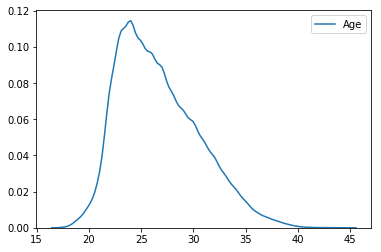

In [21]:
## vizualização da distribuição
sns.kdeplot(df_completo['Age'], legend=True)

In [22]:
# função para discretizar Age
def discrAge(x):
    if x < df_completo['Age'].quantile(0.333):
        return 'Júnior'
    elif x < df_completo['Age'].quantile(0.666):
        return 'Médio'
    else:
        return 'Sênior'
    
df_completo['Age_disc'] = df_completo['Age'].apply(discrAge)

In [23]:
df_completo.head(20)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,TOV,PF,PTS,height,weight,collage,born,birth_city,birth_state,Age_disc
0,1950,Curly Armstrong,G-F,31.0,FTW,63,NaN,NaN,NaN,0.495832,...,NaN,217,458,180.0,77.0,Indiana University,1918.0,Não identificado,Não identificado,Sênior
1,1950,Cliff Barker,SG,29.0,INO,49,NaN,NaN,NaN,0.495832,...,NaN,99,279,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,Sênior
2,1950,Leo Barnhorst,SF,25.0,CHS,67,NaN,NaN,NaN,0.495832,...,NaN,192,438,193.0,86.0,University of Notre Dame,1924.0,Não identificado,Não identificado,Médio
3,1950,Ed Bartels,F,24.0,TOT,15,NaN,NaN,NaN,0.495832,...,NaN,29,63,196.0,88.0,North Carolina State University,1925.0,Não identificado,Não identificado,Médio
4,1950,Ed Bartels,F,24.0,DNN,13,NaN,NaN,NaN,0.495832,...,NaN,27,59,196.0,88.0,North Carolina State University,1925.0,Não identificado,Não identificado,Médio
5,1950,Ed Bartels,F,24.0,NYK,2,NaN,NaN,NaN,0.495832,...,NaN,2,4,196.0,88.0,North Carolina State University,1925.0,Não identificado,Não identificado,Médio
6,1950,Ralph Beard,G,22.0,INO,60,NaN,NaN,NaN,0.495832,...,NaN,132,895,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,Júnior
7,1950,Gene Berce,G-F,23.0,TRI,3,NaN,NaN,NaN,0.495832,...,NaN,6,10,180.0,79.0,Marquette University,1926.0,Não identificado,Não identificado,Júnior
8,1950,Charlie Black,F-C,28.0,TOT,65,NaN,NaN,NaN,0.495832,...,NaN,273,661,196.0,90.0,University of Kansas,1921.0,Arco,Idaho,Sênior
9,1950,Charlie Black,F-C,28.0,FTW,36,NaN,NaN,NaN,0.495832,...,NaN,140,382,196.0,90.0,University of Kansas,1921.0,Arco,Idaho,Sênior


# Análise de dados

### 1) Qual a média de idade/peso dos jogadores?

In [24]:
print('Média de idade dos jogadores: ', df_completo['Age'].mean())
print('Média de peso dos jogadores: ', df_completo['weight'].mean())

Média de idade dos jogadores:  26.66440526486838
Média de peso dos jogadores:  95.43213392274836


### 2) Qual a média de idade/peso dos jogadores na década de 50? Compare com a década de 90.

In [25]:
print('Década de 50')
print('Média de idade dos jogadores: ', df_completo.loc[(df_completo['Year'] >= 1950) & (df_completo['Year'] <= 1959)].mean()['Age'])
print('Média de peso dos jogadores: ', df_completo.loc[(df_completo['Year'] >= 1950) & (df_completo['Year'] <= 1959)].mean()['weight'])
print('\n')
print('Década de 90')
print('Média de idade dos jogadores: ', df_completo.loc[(df_completo['Year'] >= 1990) & (df_completo['Year'] <= 1999)].mean()['Age'])
print('Média de peso dos jogadores: ', df_completo.loc[(df_completo['Year'] >= 1990) & (df_completo['Year'] <= 1999)].mean()['weight'])

Década de 50
Média de idade dos jogadores:  26.05617198335645
Média de peso dos jogadores:  88.43020128077207


Década de 90
Média de idade dos jogadores:  27.19031141868512
Média de peso dos jogadores:  95.56518496724992


### 3) Qual o jogador que mais marcou pontos na série histórica (desconsiderando ano/time)? Achou o resultado? Se sim, joga o nome no Google �...

In [26]:
df_completo.groupby(['Player'])['PTS'].sum().sort_values(ascending=False).head(1)

Player
Kareem Abdul-Jabbar*    38387
Name: PTS, dtype: int64

### 4) Qual foi primeiro jogador a atingir a marca de 2 mil pontos em um único time? Em que ano isso aconteceu?

In [27]:
print('Primeiro jogador a atingir 2 mil pontos em um único time:')
print((df_completo.groupby(['Player', 'Tm', 'Year']).filter(lambda x: x['PTS'].sum() >= 2000)).sort_values('Year', ascending=True).head(1)[['Year','Player']])

Primeiro jogador a atingir 2 mil pontos em um único time:
      Year           Player
1339  1958  George Yardley*


### 5) Qual jogador que jogou por mais tempo na NBA?

In [28]:
df_completo.groupby(['Player'])['MP'].sum().sort_values(ascending=False).head(1)

Player
Kareem Abdul-Jabbar*    57446.0
Name: MP, dtype: float64

### 6) Qual jogador permaneceu mais tempo em um mesmo time? Qual é este time? Por quanto tempo ele ficou neste time?

In [29]:
df_completo.groupby(['Player', 'Tm'])['Year'].count().sort_values(ascending=False).head(1)

Player       Tm 
Kobe Bryant  LAL    20
Name: Year, dtype: int64

# Exercício 2

### 1) Importe os dados do arquivo para um data frame.

In [30]:
df_cafe = pd.DataFrame(pd.read_csv('CAFE_DA_MANHA.csv', sep=','))
df_cafe.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


### No df, crie um campo novo chamado “Qtd” com a constante 1 (esse campo será usando posteriormente...);

In [31]:
df_cafe['qtd'] = 1
df_cafe.head()

,Date,Time,Transaction,Item,qtd
0,2016-10-30,09:58:11,1,Bread,1
1,2016-10-30,10:05:34,2,Scandinavian,1
2,2016-10-30,10:05:34,2,Scandinavian,1
3,2016-10-30,10:07:57,3,Hot chocolate,1
4,2016-10-30,10:07:57,3,Jam,1


### 2) Crie um df pivotado a partir do df original, através do método pandas pivot_table();
### a. A constante “Qtd” = 1 que criamos no passo anterior será usada aqui (values = 'Qtd');
### b. Nessa etapa, aproveite o parâmetro fill_value do método para preencher os espaços vazios com zeros;

In [32]:
df_cafe_pivot = df_cafe.pivot_table(values = 'qtd', index = 'Transaction', columns = 'Item',fill_value = 0)
df_cafe_pivot.head(20)
##cafe_manha_pvt = pd.pivot_table(aux, values='Qtd', fill_value=0, index='Transaction', columns='Item')

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3) Feito isso, crie uma nova matriz, agora com o valores resultantes da aplicação da equação de correlação de Pearson (correlação deve ser aplicada sobre a matriz pivotada do passo anterior).

In [33]:
corr_cafe = df_cafe_pivot.corr()
corr_cafe

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Item,,,,,,,,,,,,,,,,,,,,,
Adjustment,1.000000,-0.000690,-0.001982,-0.000278,-0.000648,-0.000105,-0.001304,-0.000729,-0.000235,-0.000257,...,-0.000105,-0.000802,-0.001278,-0.001903,-0.001469,-0.000481,-0.000379,-0.000420,-0.000759,-0.000278
Afternoon with the baker,-0.000690,1.000000,-0.013027,0.113756,-0.004259,-0.000690,-0.008570,-0.004790,-0.001542,-0.001690,...,-0.000690,0.014863,-0.008397,-0.012507,0.001491,-0.003163,-0.002488,-0.002761,-0.004986,-0.001825
Alfajores,-0.001982,-0.013027,1.000000,-0.005246,0.014537,-0.001982,-0.002183,0.002126,-0.004433,-0.004857,...,-0.001982,-0.007908,0.012506,-0.020289,0.016296,-0.009093,-0.007151,-0.007935,0.000941,0.015518
Argentina Night,-0.000278,0.113756,-0.005246,1.000000,-0.001715,-0.000278,-0.003451,-0.001929,-0.000621,-0.000680,...,-0.000278,-0.002121,-0.003381,-0.005037,-0.003887,-0.001274,-0.001002,0.093494,-0.002008,-0.000735
Art Tray,-0.000648,-0.004259,0.014537,-0.001715,1.000000,0.161906,0.005236,0.019019,0.071262,-0.001588,...,-0.000648,0.016458,-0.007891,0.006788,0.014630,-0.002973,-0.002338,-0.002594,-0.004686,-0.001715
Bacon,-0.000105,-0.000690,-0.001982,-0.000278,0.161906,1.000000,-0.001304,-0.000729,-0.000235,-0.000257,...,-0.000105,-0.000802,-0.001278,-0.001903,-0.001469,-0.000481,-0.000379,-0.000420,-0.000759,-0.000278
Baguette,-0.001304,-0.008570,-0.002183,-0.003451,0.005236,-0.001304,1.000000,0.014606,-0.002917,-0.003195,...,-0.001304,-0.009961,-0.015878,-0.004997,-0.000370,-0.005982,-0.004705,-0.005220,0.001941,-0.003451
Bakewell,-0.000729,-0.004790,0.002126,-0.001929,0.019019,-0.000729,0.014606,1.000000,-0.001630,-0.001786,...,-0.000729,-0.005567,-0.008874,0.011542,0.000349,-0.003343,-0.002629,-0.002917,-0.005269,-0.001929
Bare Popcorn,-0.000235,-0.001542,-0.004433,-0.000621,0.071262,-0.000235,-0.002917,-0.001630,1.000000,-0.000575,...,-0.000235,-0.001793,-0.002858,-0.004256,-0.003285,-0.001077,-0.000847,-0.000939,-0.001697,-0.000621


### 4) Plote um gráfico de calor sobre a matriz de correlação.

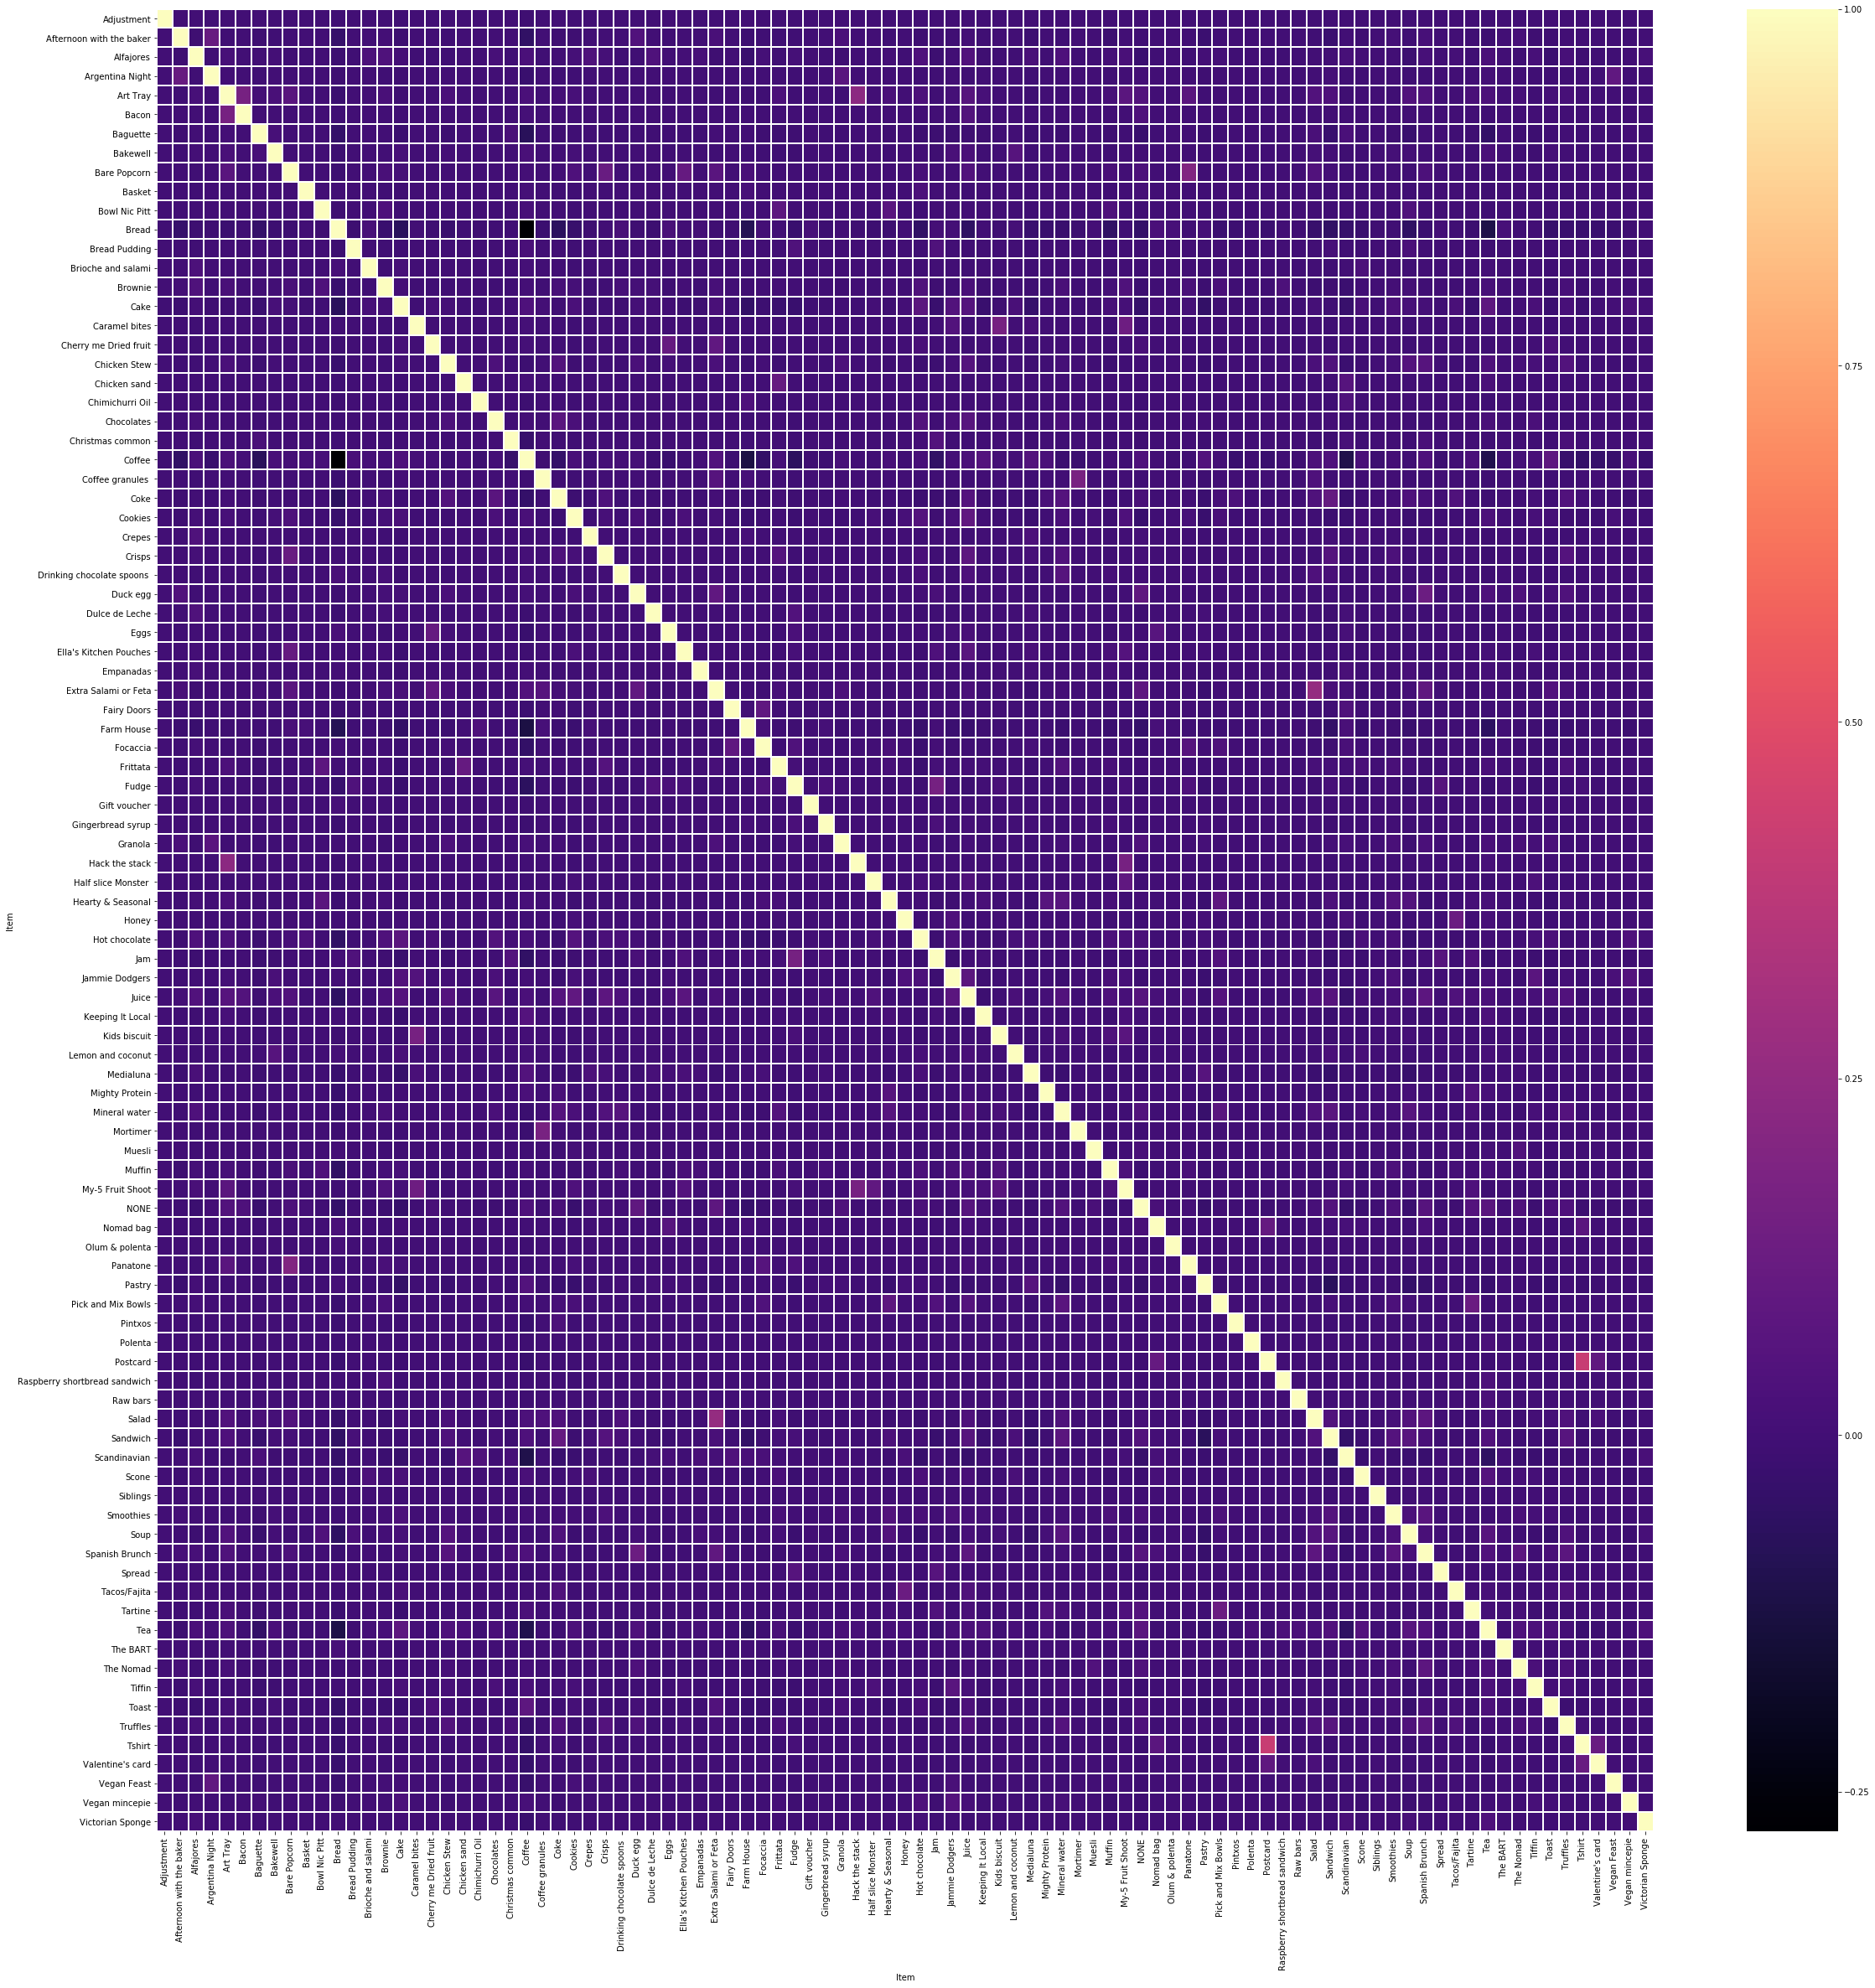

In [34]:
plt.figure(figsize=[40,40])
sns.heatmap(corr_cafe, cmap='magma', linecolor='w', linewidths=1)

### 5) Encontrou alguma correlação interessante entre os produtos? Quais? 
#### Maior correlação entre café e pão, chá e pão também tem uma correlação alta. Correlação entre compra de fazenda e café, mas considerando que são itens de lanchonete, provavelmente o dado "fazenda" está errado. Correlação entre tshirt e postcard.